In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

In [2]:
DFs=pickle.load(open('DFs.pkl', 'rb'))
Summaries=pickle.load(open('Summaries.pkl', 'rb'))
print(len(DFs),len(Summaries))

357 357


In [3]:
myFormat = DateFormatter("%d-%m")
register_matplotlib_converters(myFormat)

# Plot Heart Rates

In [4]:
%matplotlib inline

def plotHeartRate(toPlot, DFs,Summaries):

    nPlots=len(toPlot)
    print('nPlots',nPlots)
    fig, axs = plt.subplots(nrows=nPlots, ncols=1, figsize=(15, 2*nPlots) )

    myFormat = DateFormatter("%H:%M")
    register_matplotlib_converters(myFormat)

    i=0
    for index in toPlot:
        df=DFs[ index ]
        summary=Summaries[ index ]
        axs[i].plot(df['dateTime'], df['BPM'])
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('BPM')
        axs[i].set_title( summary['string'] )
        axs[i].grid(True)
        axs[i].xaxis.set_major_formatter(myFormat)
        i+=1
        
    fig.tight_layout()
    plt.show()

# end plotHeartRate

nPlots 10


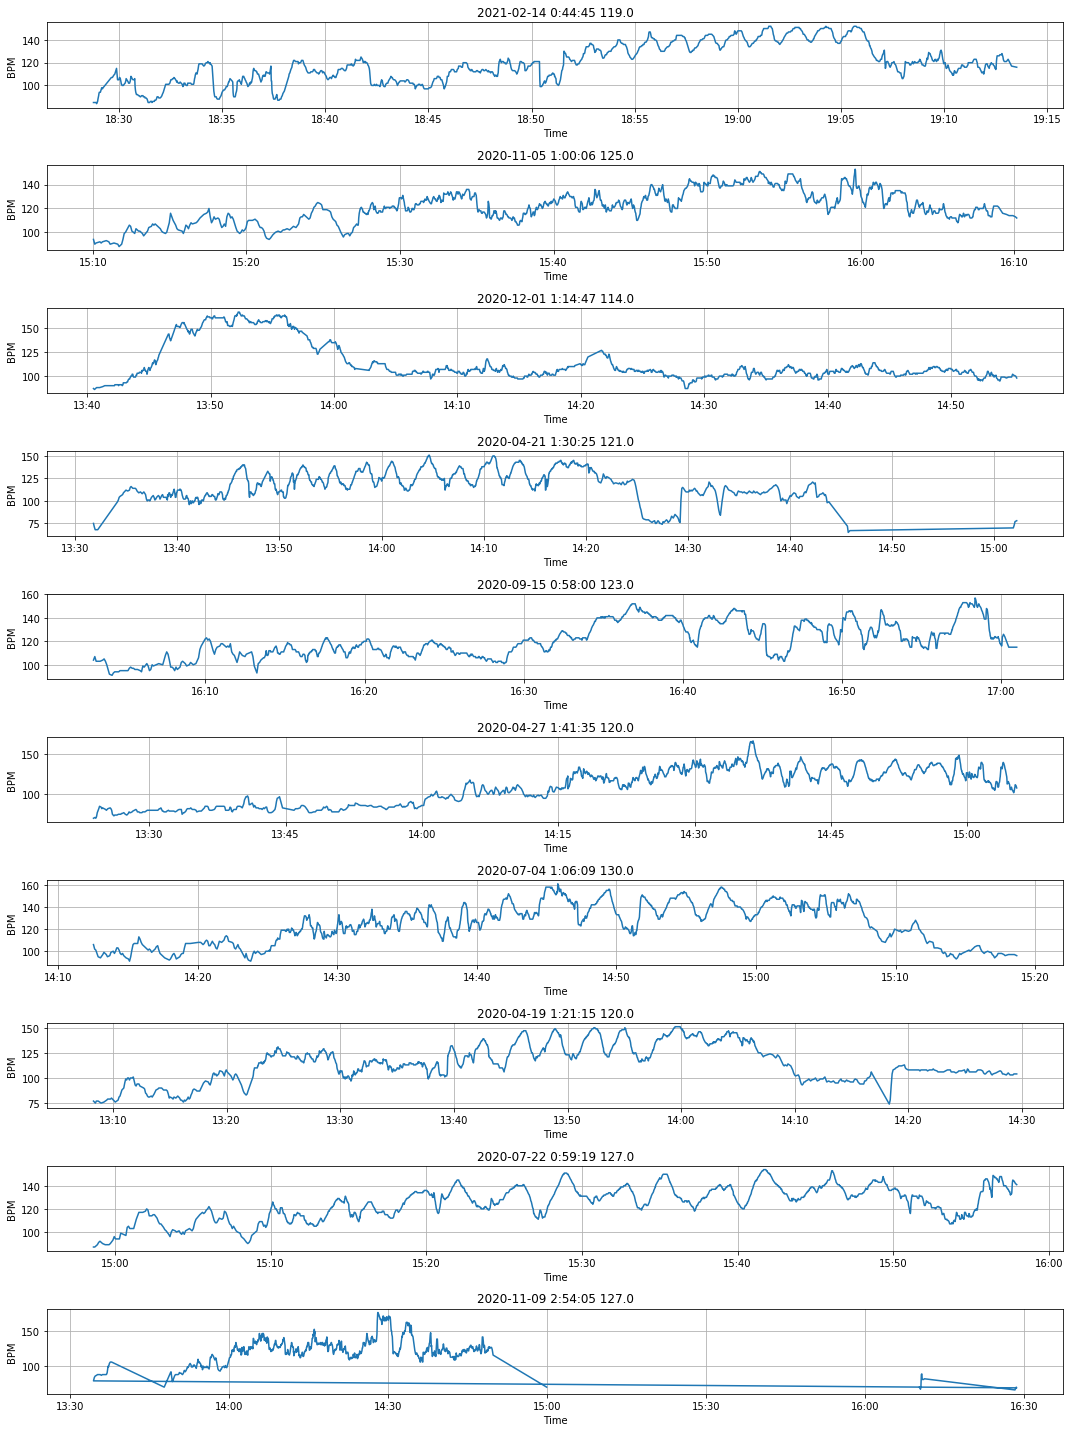

In [5]:
# Plot activities with HIGHEST attribute

# argpartition is used to collect the right indices, see:
#https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array

attribute='peakZone' # 'meanBPM'
nPlots=10

y=[d[attribute] for d in Summaries]
y=np.array(y)
#print(np.sort(y))

toPlot=np.argpartition(y, -nPlots)[-nPlots:]
#print('\n',toPlot,'\n',y[toPlot],'\n',np.sort(y[toPlot]))

plotHeartRate(toPlot,DFs,Summaries)